# Generate datasets for integration

Here our aim is to use the RNAseq, Proteomics, and DNAmethylation datasets to identify different regulatory programs that change between conditions.


In [1]:
from sciutil import SciUtil
import pandas as pd
import os

base_dir = '../data/S050_CCRCC_Clark_Cell2019/'
fig_dir = '../figures/data_qc/'
output_dir = f'{base_dir}sircle/'
supp_dir =  f'{base_dir}supps/'

u = SciUtil()

## Load pre-generated datasets of all patients



In [2]:
rna_df = pd.read_csv(f'{output_dir}rna_df_sircle_ccRCC.csv')
rna_sample_df = pd.read_csv(f'{output_dir}rna_sample_df_sircle_ccRCC.csv',  index_col=0)

prot_sample_df = pd.read_csv(f'{output_dir}prot_sample_data_sircle_ccRCC.csv', index_col=0)
prot_df = pd.read_csv(f'{output_dir}prot_data_sircle_ccRCC.csv')

meth_df = pd.read_csv(f'{output_dir}meth_df_CPTAC-TCGA.csv') # Merged with TCGA columns as normal
clin_df = pd.read_csv(f'{output_dir}clinical_sircle.csv')
# Now we want to merge the clinical info with the cases from the sample df
meth_sample_df =  pd.read_csv(f'{output_dir}meth_sample_df_CPTAC-TCGA.csv', index_col=0)


## Re-format names to ensure consistency 

Since we will be integrating the data later on, I wanted to ensure that the different datatsets can be easily integrated and the data source is known. 

Format is: `Datatype_Condition_caseID_replicate-sampleid`

#### RNA full label
	Normal_C3L.00004_1 --> RNA_Normal_C3L.00004_1

#### Protein full label
	Normal_C3L.00004_CPT0001550001 --> Protein_Normal_C3L.00004_CPT0001550001

#### DNA Methylation full label
	C3L-00004_Tumor --> CpG_Normal_C3L.00004 
    


In [3]:
###############################################################################
#                                                                             #
#    This program is free software: you can redistribute it and/or modify     #
#    it under the terms of the GNU General Public License as published by     #
#    the Free Software Foundation, either version 3 of the License, or        #
#    (at your option) any later version.                                      #
#                                                                             #
#    This program is distributed in the hope that it will be useful,          #
#    but WITHOUT ANY WARRANTY; without even the implied warranty of           #
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the            #
#    GNU General Public License for more details.                             #
#                                                                             #
#    You should have received a copy of the GNU General Public License        #
#    along with this program. If not, see <http://www.gnu.org/licenses/>.     #
#                                                                             #
###############################################################################

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

from sciviso import Vis


class Heatmap(Vis):

    def __init__(self, df: pd.DataFrame, chart_columns: list, row_index: str, title='', xlabel='', ylabel='',
                 cluster_rows=True, cluster_cols=True, row_colours=None, col_colours=None, vmin=None, vmax=None,
                 linewidths=0.5, x_tick_labels=1, y_tick_labels=1, rows_to_colour=None, cols_to_colour=None,
                 figsize=(3, 3), title_font_size=8, label_font_size=6, title_font_weight=700, cmap='RdBu_r',
                 annot=False, color_palettes=None, col_color_labels=None,
                 config={}):
        super().__init__(df, figsize=figsize, title_font_size=title_font_size, label_font_size=label_font_size,
                         title_font_weight=title_font_weight)
        self.chart_columns = chart_columns
        self.row_index = row_index
        self.title = title
        self.cluster_rows = cluster_rows
        self.cluster_cols = cluster_cols
        self.col_colours = col_colours
        self.row_colours = row_colours
        self.rows_to_colour = rows_to_colour
        self.cols_to_colour = cols_to_colour
        self.vmin = vmin
        self.vmax = vmax
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.cmap_str = cmap
        self.col_color_labels = col_color_labels
        self.color_palettes = color_palettes if color_palettes else [
            'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr',
            'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c']
        self.x_tick_labels = x_tick_labels
        self.y_tick_labels = y_tick_labels
        self.linewidths = linewidths
        self.annot = annot
        if config:
            self.load_style(config)

    def plot(self, ax=None, linecolor="none"):
        self.check_args_in_columns([self.chart_columns, [self.row_index]])
        df_dists = pd.DataFrame(self.df[self.chart_columns].values)
        df_dists.columns = self.chart_columns
        df_dists.index = self.df[self.row_index].values
        # Check if the user has got row_colours defined
        if self.rows_to_colour:
            self.row_colours = []
            for i, rc in enumerate(self.rows_to_colour):
                labels = self.df[rc].values
                lut = dict(zip(set(labels), sns.color_palette(self.color_palettes[i], len(set(labels)))))
                self.row_colours.append(pd.DataFrame(labels)[0].map(lut))
        if ax:
            ax = sns.clustermap(df_dists, col_cluster=self.cluster_cols, figsize=self.figsize, row_cluster=self.cluster_rows,
                                col_colors=self.col_colours, ax=ax, annot=self.annot,
                                row_colors=self.row_colours, cmap=self.cmap_str, vmax=self.vmax, vmin=self.vmin,
                                yticklabels=self.y_tick_labels, xticklabels=self.x_tick_labels, linewidths=self.linewidths, linecolor=linecolor)
        else:
            ax = sns.clustermap(df_dists, col_cluster=self.cluster_cols, figsize=self.figsize, row_cluster=self.cluster_rows,
                                col_colors=self.col_colours, annot=self.annot,
                                row_colors=self.row_colours, cmap=self.cmap_str, vmax=self.vmax, vmin=self.vmin,
                                yticklabels=self.y_tick_labels, xticklabels=self.x_tick_labels,
                                linewidths=self.linewidths,
                                linecolor=linecolor)
        if self.rows_to_colour:
            for i, rc in enumerate(self.rows_to_colour):
                labels = self.df[rc].values
                lut = dict(zip(set(labels), sns.color_palette(self.color_palettes[i], len(set(labels)))))
                handles = [Patch(facecolor=lut[name]) for name in lut]
                legend = plt.legend(handles, lut, bbox_to_anchor=(2, i))
                plt.gca().add_artist(legend)
        
        if self.col_color_labels:
            labels = self.col_color_labels
            lut = dict(zip(set(labels), sns.color_palette(list(set(self.col_colours)), len(set(labels)))))
            handles = [Patch(facecolor=lut[name]) for name in lut]
            legend = plt.legend(handles, lut, bbox_to_anchor=(2, 0))
            plt.gca().add_artist(legend)

        plt.title(self.title)
        plt.setp(ax.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
        plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')
        ax.ax_heatmap.tick_params(labelsize=self.label_font_size)
        self.add_labels(title=False, x=False)
        ax.fig.suptitle(self.title, fontsize=self.title_font_size, fontweight=self.title_font_weight)
        ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xmajorticklabels(), fontsize=self.label_font_size)
        self.set_ax_params(ax.ax_heatmap)
        plt.tight_layout()
        return ax

    def plot_hm(self, ax=None, linecolor="black"):
        self.check_args_in_columns([self.chart_columns, [self.row_index]])
        df_dists = pd.DataFrame(self.df[self.chart_columns].values)
        df_dists.columns = self.chart_columns
        df_dists.index = self.df[self.row_index].values
        if ax:
            ax = sns.heatmap(df_dists,
                             ax=ax, cmap=self.cmap_str, vmax=self.vmax, vmin=self.vmin, annot=self.annot,
                             yticklabels=self.y_tick_labels, xticklabels=self.x_tick_labels, linewidths=self.linewidths,
                             linecolor=linecolor)
        else:
            ax = sns.heatmap(df_dists, cmap=self.cmap_str, vmax=self.vmax, vmin=self.vmin, annot=self.annot,
                             yticklabels=self.y_tick_labels, xticklabels=self.x_tick_labels, linewidths=self.linewidths,
                             linecolor=linecolor)
        plt.title(self.title)
        plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')
        ax.tick_params(labelsize=self.label_font_size)
        self.add_labels(title=False, x=False)
        ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=self.label_font_size)
        self.set_ax_params(ax)
        plt.tight_layout()
        #plt.colorbar(ax=ax, shrink=0.3, aspect=3, orientation='horizontal')
        return ax

In [4]:
prot_sample_df['RaceGrouped'].value_counts()

White       135
Slavonic     18
Asian        10
Hispanic      6
Name: RaceGrouped, dtype: int64

In [5]:
prot_sample_df['AgeGrouped'].value_counts()

old       111
middle     60
young      13
Name: AgeGrouped, dtype: int64

In [6]:
prot_sample_df['gender'].value_counts()

Male      141
Female     43
Name: gender, dtype: int64

In [7]:
palette = ['#483873', '#1BD8A6', '#B117B7', '#AAC7E2', '#FFC107', '#016957', '#9785C0',
     '#D09139', '#338A03', '#FF69A1', '#5930B1', '#FFE884', '#35B567', '#1E88E5',
     '#ACAD60', '#A2FFB4', '#B618F5', '#854A9C']
plt.rcParams['svg.fonttype'] = 'none'  # Ensure text is saved as text
plt.rcParams['figure.figsize'] = (3, 2)
sns.set(rc={'figure.figsize': (3, 2), 'font.family': 'sans-serif',
            'font.sans-serif': 'Arial', 'font.size': 9}, style='ticks')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Stage I'),
  Text(1, 0, 'Stage II'),
  Text(2, 0, 'Stage III'),
  Text(3, 0, 'Stage IV')])

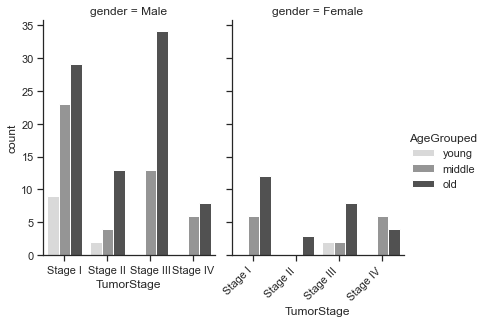

In [8]:
g = sns.catplot(x="TumorStage", hue="AgeGrouped", col="gender",
                order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'],
                data=prot_sample_df, kind="count", palette='Greys', hue_order=['young', 'middle', 'old'],
                height=4, aspect=.7)
plt.xticks(rotation=45, ha='right')
#plt.savefig(f'{fig_dir}patient_demographics_age.svg')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Stage I'),
  Text(1, 0, 'Stage II'),
  Text(2, 0, 'Stage III'),
  Text(3, 0, 'Stage IV')])

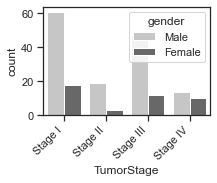

In [9]:
g = sns.countplot(x="TumorStage", hue="gender",
                order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'],
                data=prot_sample_df, palette='Greys')
plt.xticks(rotation=45, ha='right')
#plt.savefig(f'{fig_dir}patient_demographics.svg')

In [10]:
rna_sample_df['AgeGrouped'].value_counts()

old       139
middle     85
young      15
Name: AgeGrouped, dtype: int64

In [11]:
rna_sample_df['TumorStage'].value_counts()

Stage I      99
Stage III    74
Stage IV     37
Stage II     29
Name: TumorStage, dtype: int64

## Code for generating the datasets

In [15]:
# Have a look at clustering each of these
from sklearn.decomposition import PCA

def do_plts(df, sample_df, title, fig_dir, value="CPT"):
    cases = [c for c in df.columns if value in c]
    corr = df[cases].corr()
    row_colors_t = [[], [], [], []]
    ages = sample_df['AgeGrouped'].values
    genders = sample_df['gender'].values
    #cimps = sample_df['CIMPStatus'].values
    for i, c in enumerate(sample_df['CondId'].values):
        if c == 1:
            row_colors_t[0].append('red')
        else:
            row_colors_t[0].append('blue')
        if ages[i] == 'middle':
            row_colors_t[1].append('grey')
        elif ages[i] == 'old':
            row_colors_t[1].append('black') 
        else:
            row_colors_t[1].append('lightgrey') 
            
        if genders[i] == 'Male':
            row_colors_t[2].append('green')
        else:
            row_colors_t[2].append('yellow') 
        row_colors_t[3].append('pink')
#         if cimps[i] == 1:
#             row_colors_t[3].append('pink')
#         else:
#             row_colors_t[3].append('purple')

    sns.clustermap(corr, 
                    xticklabels=sample_df['FullLabel'].values,
                    yticklabels=sample_df['FullLabel'].values, cmap='RdBu_r', row_cluster=True, 
                    col_cluster=True, row_colors=row_colors_t)
    plt.title(title)
    plt.savefig(os.path.join(fig_dir, f'Heatmap_{title}.svg'))
    plt.show()

    vals = df[cases].values.T
    pca = PCA(n_components=2)
    pca_values = pca.fit_transform(vals)
    var_ratio = pca.fit(vals).explained_variance_ratio_

    """
    ---------------------------------------------------------------
                Plot PCA
    ---------------------------------------------------------------
    """
    plt.rcParams['figure.figsize'] = [4, 4]

    plt.scatter(pca_values[:, 0], pca_values[:, 1], c=row_colors_t[0], s=400, edgecolors=row_colors_t[2], linewidths=1.5)
    plt.scatter(pca_values[:, 0], pca_values[:, 1], c=row_colors_t[3], s=100, marker="X", edgecolors=row_colors_t[1], linewidths=1.5)

    plt.title(f'{title} PCA VAR: 0: {var_ratio[0]}, 1: {var_ratio[1]}')
    plt.savefig(os.path.join(fig_dir, f'PCA_{title}.svg'))

    # Now we want to fit everything except the gene IDs 
    plt.show()

## Generate datasets

## Save all tumour vs normal

RNA 66 173 239 239


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


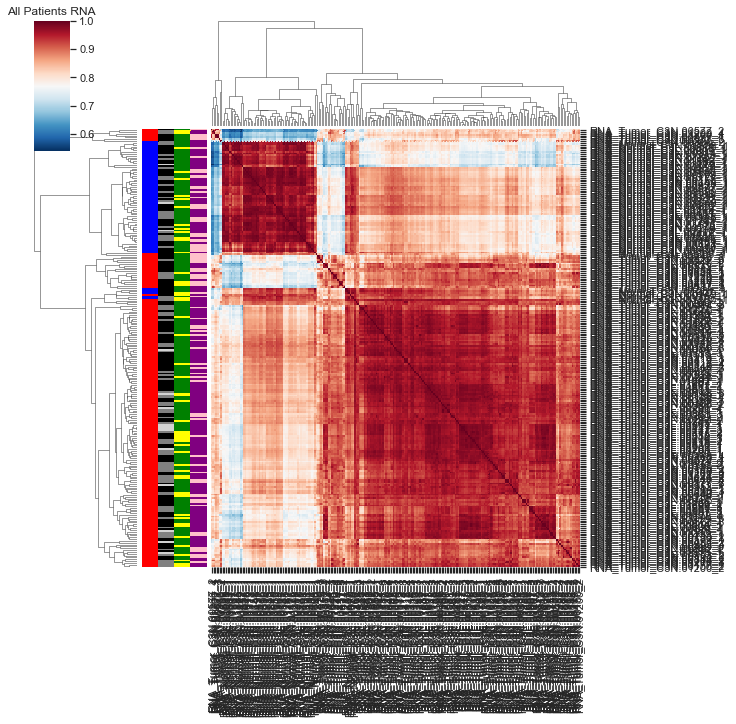

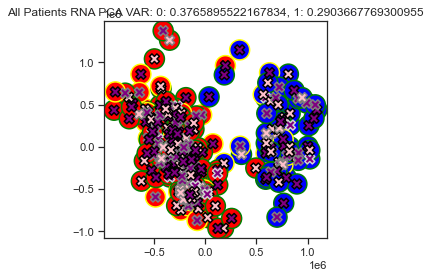

Protein 81 103 184 184


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


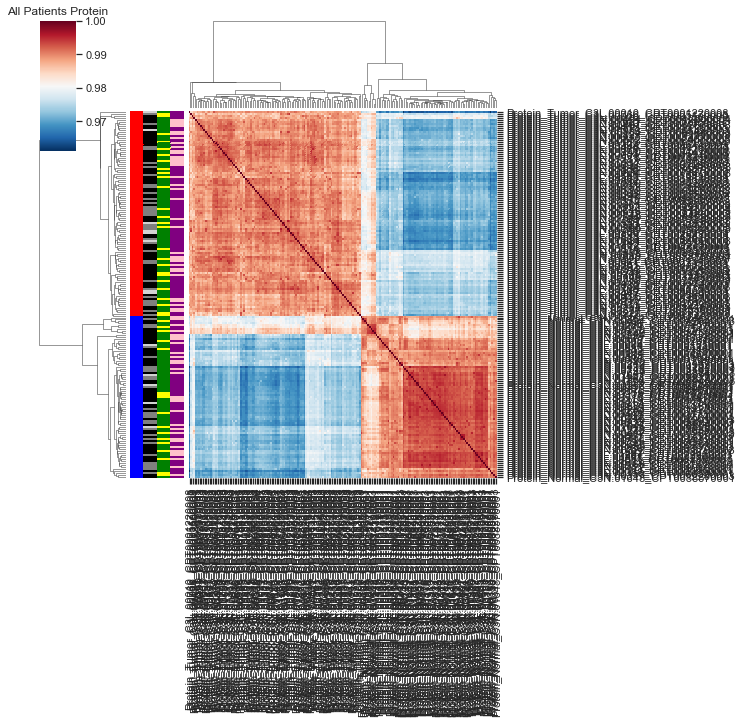

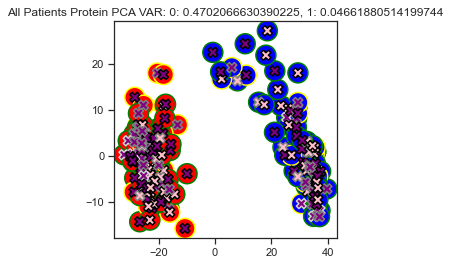

In [13]:
test_title = 'all_patients_ccRCC'

# RNA
meta_cols = [c for c in rna_df.columns if 'RNA' not in c and 'Unnamed' not in c]
normal_cases = [c.split('_')[2] for c in rna_df.columns if 'Normal' in c]
tumour_cases = [c.split('_')[2] for c in rna_df.columns if 'Tumor' in c]
cases_matched = [c for c in tumour_cases] + [c for c in normal_cases] #[c for c in tumour_cases if c in normal_cases]
case_cols = [c for c in rna_df.columns if 'RNA' in c and c.split('_')[2] in cases_matched]
print("RNA", len(normal_cases), len(tumour_cases), len(cases_matched), len(case_cols))
sub_sample_df = rna_sample_df[rna_sample_df['FullLabel'].isin(case_cols)]
data_df = rna_df[meta_cols + list(rna_sample_df['FullLabel'].values)]
#sub_sample_df.to_csv(os.path.join(output_dir, f'all_patients/rna_sample_data_{test_title}_sircle.csv'))
#data_df.to_csv(os.path.join(output_dir, f'all_patients/rna_data_{test_title}_sircle.csv'), index=False)
do_plts(data_df, sub_sample_df, 'All Patients RNA', fig_dir, value="RNA")

# Protein
meta_cols = [c for c in prot_df.columns if 'Protein' not in c]
case_cols = [c for c in prot_df.columns if 'Protein' in c]
normal_cases = [c.split('_')[2] for c in prot_df.columns if 'Normal' in c]
tumour_cases = [c.split('_')[2] for c in prot_df.columns if 'Tumor' in c]
cases_matched = [c for c in tumour_cases] + [c for c in normal_cases] #[c for c in tumour_cases if c in normal_cases]
case_cols = [c for c in prot_df.columns if 'Protein' in c and c.split('_')[2] in cases_matched]
print("Protein", len(normal_cases), len(tumour_cases), len(cases_matched), len(case_cols))
sub_sample_df = prot_sample_df[prot_sample_df['FullLabel'].isin(case_cols)]
data_df = prot_df[meta_cols + list(prot_sample_df['FullLabel'].values)]
#sub_sample_df.to_csv(os.path.join(output_dir, f'all_patients/prot_sample_data_{test_title}_sircle.csv'))
#data_df.to_csv(os.path.join(output_dir, f'all_patients/prot_data_{test_title}_sircle.csv'), index=False)
do_plts(data_df, sub_sample_df, 'All Patients Protein', fig_dir, value="Protein")



METH 151 100 251 251


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


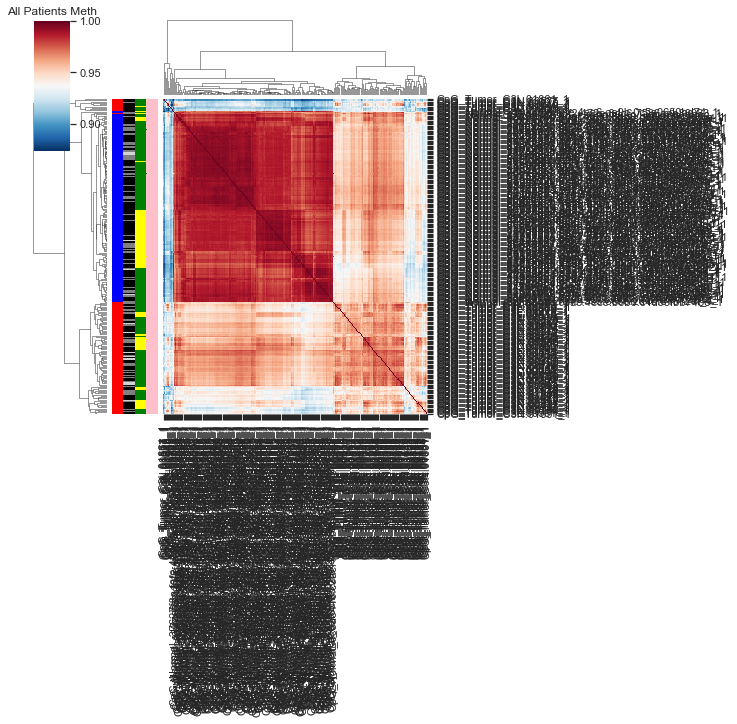

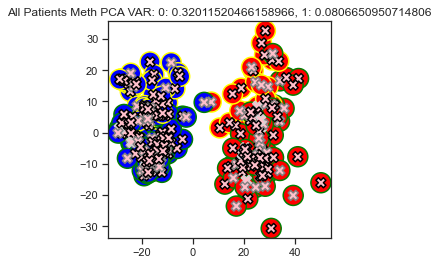

In [16]:

# Methylation
meta_cols = [c for c in meth_df.columns if 'CpG' not in c]
case_cols = [c for c in meth_df.columns if 'CpG' in c]
sub_sample_df = meth_sample_df[meth_sample_df['FullLabel'].isin(case_cols)]
data_df = meth_df[meta_cols + list(sub_sample_df['FullLabel'].values)]
normal_cases = [c.split('_')[2] for c in meth_df.columns if 'Normal' in c]
tumour_cases = [c.split('_')[2] for c in meth_df.columns if 'Tumor' in c]
cases_matched =[c for c in tumour_cases] + [c for c in normal_cases] # [c for c in tumour_cases if c in normal_cases]
print("METH", len(normal_cases), len(tumour_cases), len(cases_matched), len(case_cols))
#sub_sample_df.to_csv(os.path.join(output_dir, f'all_patients/cpg_sample_data_{test_title}_sircle.csv'))
#data_df.to_csv(os.path.join(output_dir, f'all_patients/cpg_data_{test_title}_sircle.csv'), index=False)
do_plts(data_df, sub_sample_df, 'All Patients Meth', fig_dir, value="CpG")


## Create a subset of matched patients

In [14]:
test_title = 'matched_patients'
matched_meth = {}
normal_cases = [c.split('_')[2] for c in meth_df.columns if 'Normal' in c]
tumour_cases = [c.split('_')[2] for c in meth_df.columns if 'Tumor' in c]
cases_matched = [c for c in tumour_cases if c in normal_cases]
print(cases_matched)


['C3L.00011', 'C3L.00010', 'C3L.00088', 'C3L.00079', 'C3L.00004', 'C3L.00097', 'C3L.00096', 'C3L.00026']


In [15]:
meta_cols = [c for c in meth_df.columns if 'CpG' not in c]
case_cols = [c for c in meth_df.columns if 'CpG' in c and c.split('_')[2] in cases_matched]
sub_sample_df = meth_sample_df[meth_sample_df['FullLabel'].isin(case_cols)]
case_cols = [c for c in meth_df.columns if 'CpG' in c and c.split('_')[2] in cases_matched]
matched_df = meth_df[meta_cols + list(sub_sample_df['FullLabel'].values)]


sub_sample_df.to_csv(os.path.join(output_dir, f'{test_title}/cpg_sample_data_{test_title}_sircle.csv'))
matched_df.to_csv(os.path.join(output_dir, f'{test_title}/cpg_data_{test_title}_sircle.csv'), index=False)



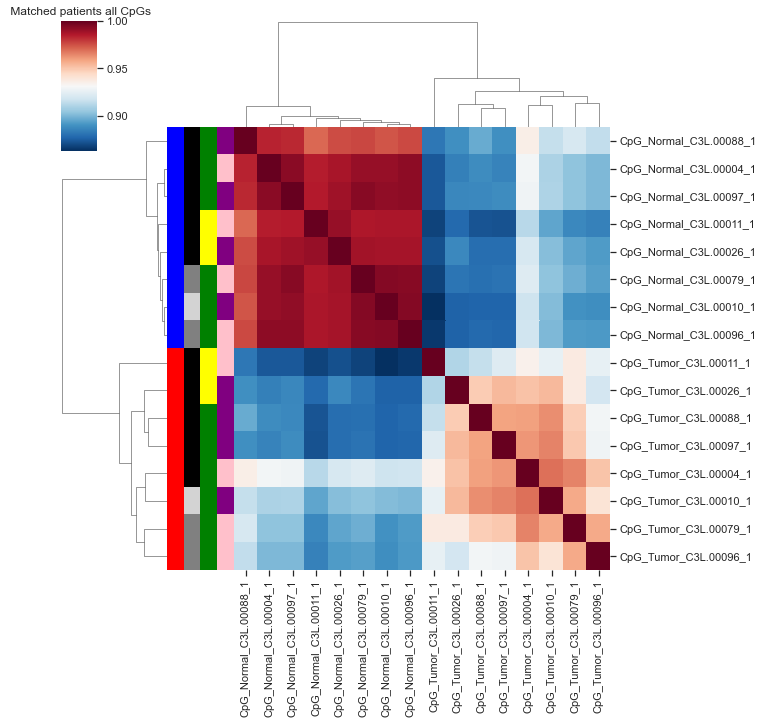

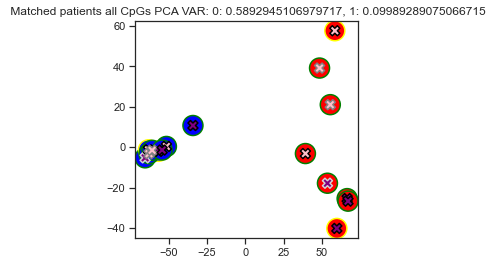

In [16]:
do_plts(matched_df, sub_sample_df, ' Matched patients all CpGs', fig_dir, value="CpG")

In [17]:
meta_cols = [c for c in rna_df.columns if 'RNA' not in c]
case_cols = [c for c in rna_df.columns if 'RNA' in c and c.split('_')[2] in cases_matched]
sub_sample_df = rna_sample_df[rna_sample_df['FullLabel'].isin(case_cols)]
case_cols = [c for c in rna_df.columns if 'RNA' in c and c.split('_')[2] in cases_matched]
matched_df = rna_df[meta_cols + list(sub_sample_df['FullLabel'].values)]
sub_sample_df.to_csv(os.path.join(output_dir, f'{test_title}/rna_sample_data_{test_title}_sircle.csv'))
matched_df.to_csv(os.path.join(output_dir, f'{test_title}/rna_data_{test_title}_sircle.csv'), index=False)



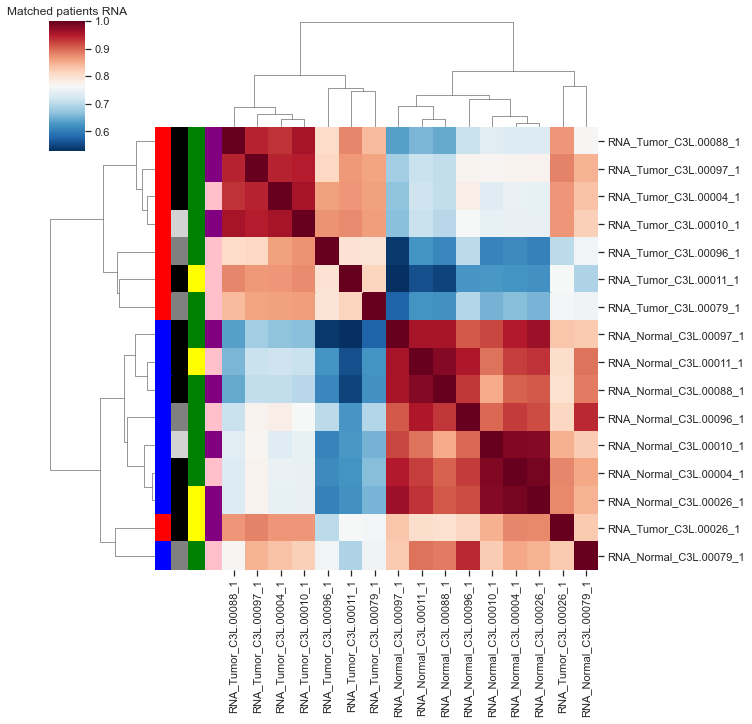

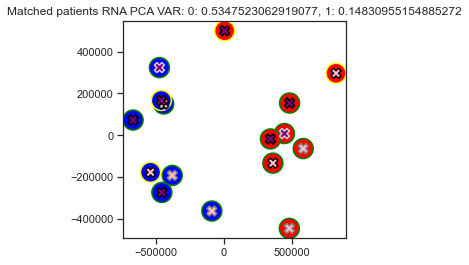

In [18]:
do_plts(matched_df, sub_sample_df, 'Matched patients RNA', fig_dir, value="RNA")


In [19]:
meta_cols = [c for c in prot_df.columns if 'Protein' not in c]
case_cols = [c for c in prot_df.columns if 'Protein' in c and c.split('_')[2] in cases_matched]
sub_sample_df = prot_sample_df[prot_sample_df['FullLabel'].isin(case_cols)]
case_cols = [c for c in rna_df.columns if 'Protein' in c and c.split('_')[2] in cases_matched]
matched_df = prot_df[meta_cols + list(sub_sample_df['FullLabel'].values)]
sub_sample_df.to_csv(os.path.join(output_dir, f'{test_title}/prot_sample_data_{test_title}_sircle.csv'))
matched_df.to_csv(os.path.join(output_dir, f'{test_title}/prot_data_{test_title}_sircle.csv'), index=False)


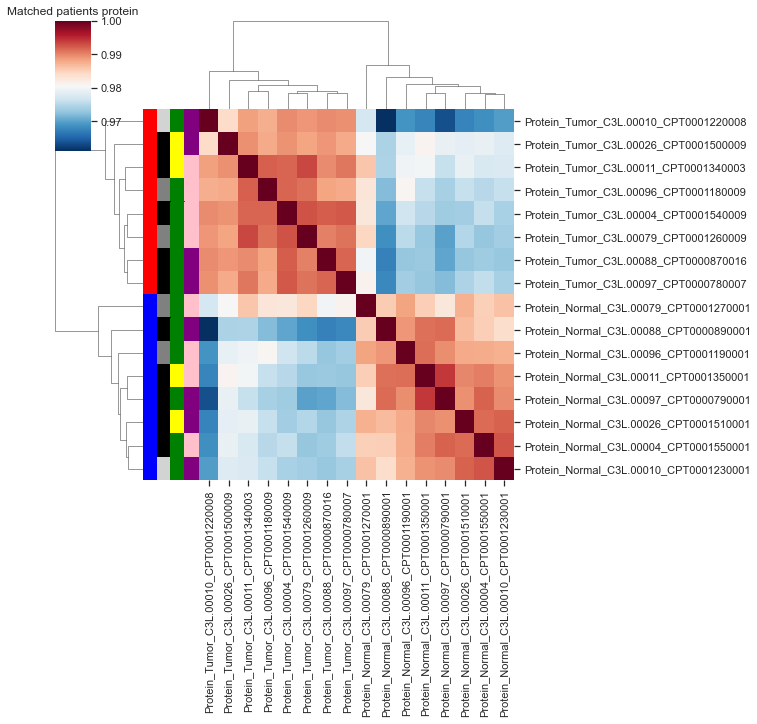

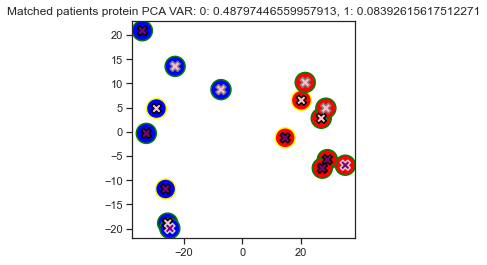

In [20]:
do_plts(matched_df, sub_sample_df, f'Matched patients protein', fig_dir, value="Protein")

## Save different island methylation datasets

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


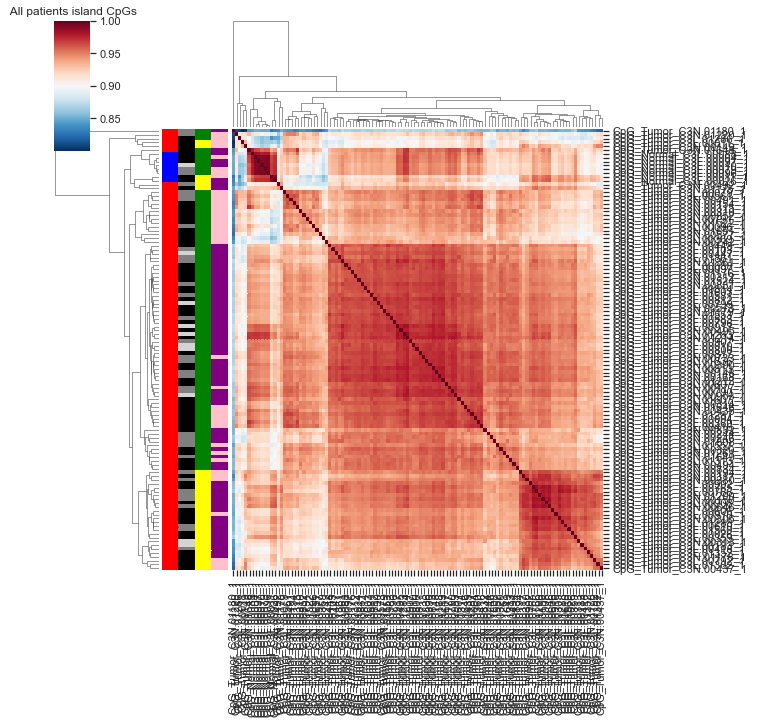

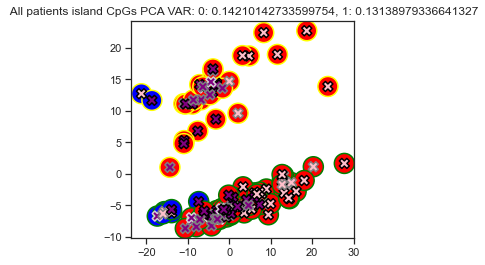

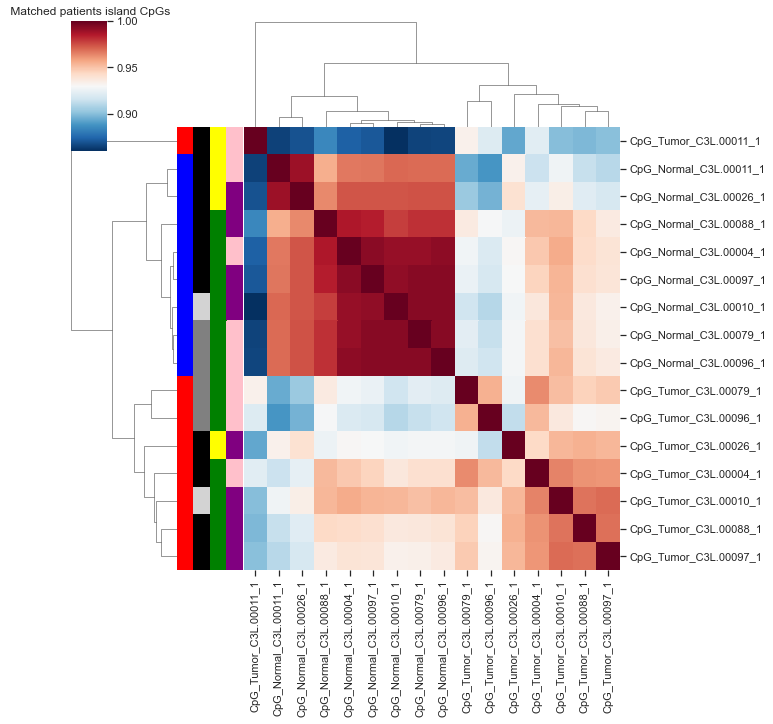

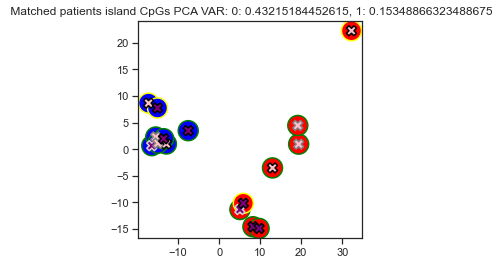

In [21]:
meth_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_filtered_meth_df_island_annotated_24012022.csv') 
test_title = 'all_patients_island'

meta_cols = [c for c in meth_df.columns if 'CpG' not in c]
case_cols = [c for c in meth_df.columns if 'CpG' in c]
sub_sample_df = meth_sample_df[meth_sample_df['FullLabel'].isin(case_cols)]
matched_df = meth_df[meta_cols + list(sub_sample_df['FullLabel'].values)]

sub_sample_df.to_csv(os.path.join(output_dir, f'all_patients/cpg_sample_data_{test_title}_sircle.csv'))
matched_df.to_csv(os.path.join(output_dir, f'all_patients/cpg_data_{test_title}_sircle.csv'), index=False)

do_plts(matched_df, sub_sample_df, ' All patients island CpGs', fig_dir, value="CpG")

test_title = 'matched_patients_island'
# Now get only the matched ones for the island dataset
meta_cols = [c for c in meth_df.columns if 'CpG' not in c]
case_cols = [c for c in meth_df.columns if 'CpG' in c and c.split('_')[2] in cases_matched]
sub_sample_df = meth_sample_df[meth_sample_df['FullLabel'].isin(case_cols)]
case_cols = [c for c in meth_df.columns if 'CpG' in c and c.split('_')[2] in cases_matched]
matched_df = meth_df[meta_cols + list(sub_sample_df['FullLabel'].values)]

sub_sample_df.to_csv(os.path.join(output_dir, f'matched_patients/cpg_sample_data_{test_title}_sircle.csv'))
matched_df.to_csv(os.path.join(output_dir, f'matched_patients/cpg_data_{test_title}_sircle.csv'), index=False)

do_plts(matched_df, sub_sample_df, ' Matched patients island CpGs', fig_dir, value="CpG")

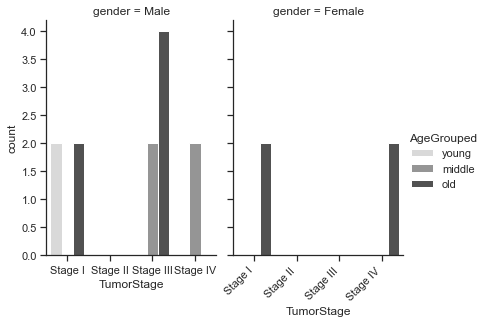

In [22]:
g = sns.catplot(x="TumorStage", hue="AgeGrouped", col="gender",
                order=['Stage I', 'Stage II', 'Stage III', 'Stage IV'],
                data=sub_sample_df, kind="count", palette='Greys', hue_order=['young', 'middle', 'old'],
                height=4, aspect=.7)
plt.xticks(rotation=45, ha='right')
plt.savefig(f'{fig_dir}patient_demographics_age_matched_data.svg')